In [1]:
import numpy as np
import matplotlib.pyplot as plt
from load_acq_rfsoc import load_data
import h5py

In [2]:
acq = '20240919T163512Z_D3A_rfsoc'
vis_all, f, prod, t_all, counts_all, glin, glog, sat_all, adc_overflows_all, fft_overflows_all, scaler_overflows_all, corr_overrun_all, frame_count_all = load_data(acq, 
              '/home/lmberkhout/data/src/drone_test_data', 
              '/home/lmberkhout/data/src/drone_ref_gains/digital_gains',
              prod_sel = None,
              freq_sel = None,
              file_sel = None,
              time_bounds = None,
              inputs = None,
              trim_non_valid_data = True,
              apply_counts = True,
              apply_gains = False,
              )

Loading data file /home/lmberkhout/data/src/drone_test_data/20240919T163512Z_D3A_rfsoc/0.hdf5
Loading data file /home/lmberkhout/data/src/drone_test_data/20240919T163512Z_D3A_rfsoc/1.hdf5
All counts have the expected 1 software frames after trimming.


In [3]:
data_path = f'/home/lmberkhout/data/src/drone_test_data/{acq}'
file = h5py.File(f'{data_path}/0.hdf5', 'r')

In [4]:
d_fft = file['fft'][:]

/home/lmberkhout/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


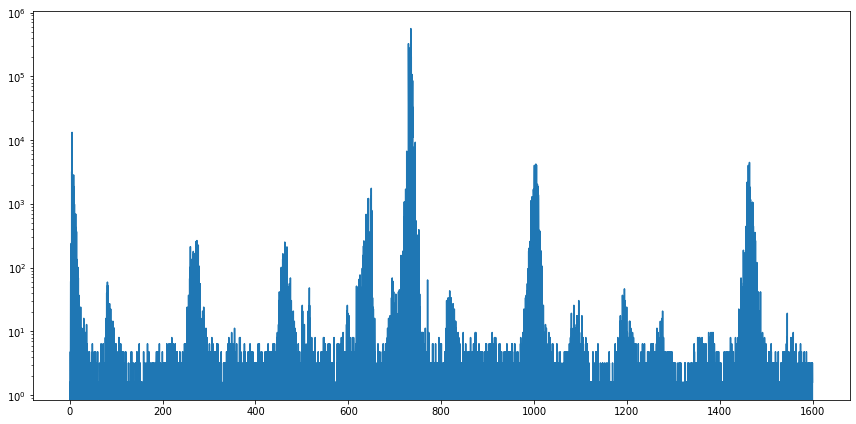

In [5]:
plt.figure(figsize = (12, 6))
plt.semilogy(f, np.mean(d_fft[3]**2, axis = 0)[4:])
plt.tight_layout()

/home/lmberkhout/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


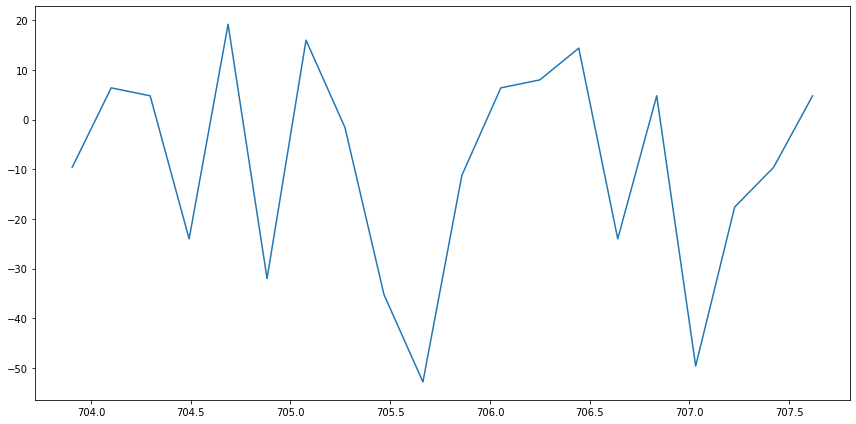

In [6]:
plt.figure(figsize = (12, 6))
plt.plot(f[3600:3620], np.mean(d_fft[3]**2, axis = 0)[3600:3620])
plt.tight_layout()

In [7]:
first_four = d_fft[0:4,:,:]
first_four.shape

(4, 10, 8192)

In [8]:
fftbeams = np.fft.fftshift(np.fft.fft(first_four, axis = 0))

In [9]:
fftbeams.shape

(4, 10, 8192)

In [10]:
binnum = 8192*(705)/(1600)

In [11]:
print(f[3605])
print(f[3608])

704.8828125
705.46875


In [12]:
print(fftbeams[0,:,3605:3610].shape)

(10, 5)


In [13]:
first = np.mean(fftbeams[0,:,3605:3608], axis = 1)
second = np.mean(fftbeams[1,:,3605:3608], axis = 1)
third = np.mean(fftbeams[2,:,3605:3608], axis = 1)
fourth = np.mean(fftbeams[3,:,3605:3608], axis = 1)

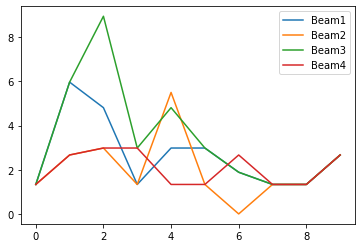

In [14]:
plt.plot(np.abs(first), label = 'Beam1')
plt.plot(np.abs(second), label = 'Beam2')
plt.plot(np.abs(third), label = 'Beam3')
plt.plot(np.abs(fourth), label = 'Beam4')
plt.legend()
plt.show()

In [22]:
for n in range(36):
    print(n, prod[n])

0 [0 0]
1 [0 1]
2 [0 2]
3 [0 3]
4 [0 4]
5 [0 5]
6 [0 6]
7 [0 7]
8 [1 1]
9 [1 2]
10 [1 3]
11 [1 4]
12 [1 5]
13 [1 6]
14 [1 7]
15 [2 2]
16 [2 3]
17 [2 4]
18 [2 5]
19 [2 6]
20 [2 7]
21 [3 3]
22 [3 4]
23 [3 5]
24 [3 6]
25 [3 7]
26 [4 4]
27 [4 5]
28 [4 6]
29 [4 7]
30 [5 5]
31 [5 6]
32 [5 7]
33 [6 6]
34 [6 7]
35 [7 7]


In [85]:
time_seconds = np.linspace(0,len(t_all)-1,337)*np.diff(t_all)[1]

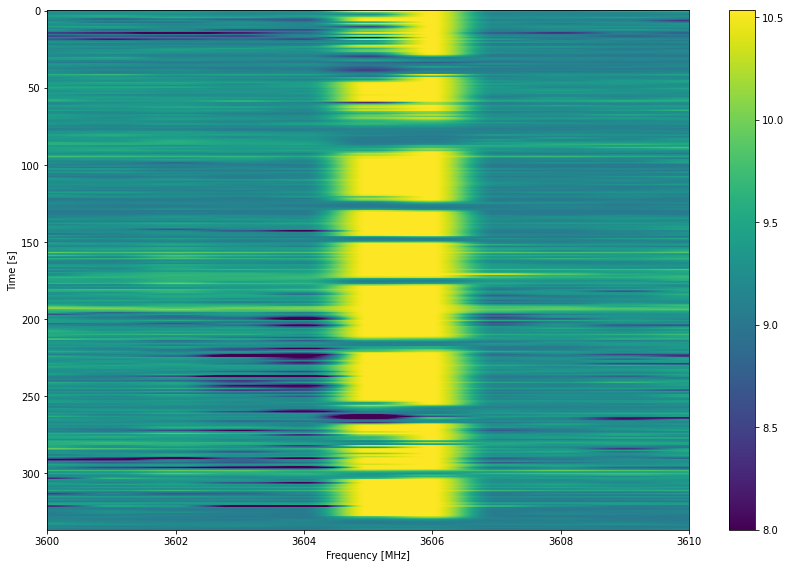

In [90]:
plt.figure(figsize = (12, 8))
plt.imshow(10*np.log10(np.abs(vis_all[:,:, 1])),aspect='auto',vmin=8)
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

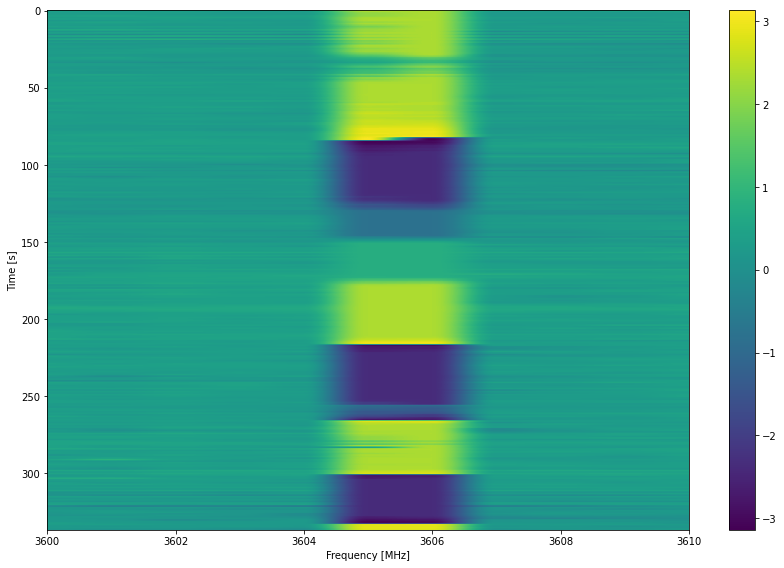

In [62]:
plt.figure(figsize = (12, 8))
plt.imshow(np.angle(vis_all[:,:, 1]),aspect='auto')
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

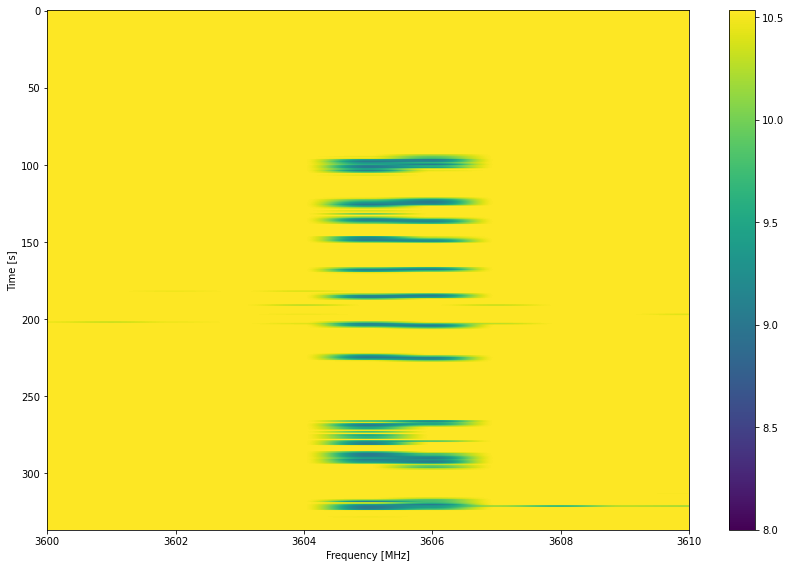

In [30]:
plt.figure(figsize = (12, 8))
plt.imshow(10*np.log10(np.abs(vis_all[:,:, 2])),aspect='auto',vmin=8)
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

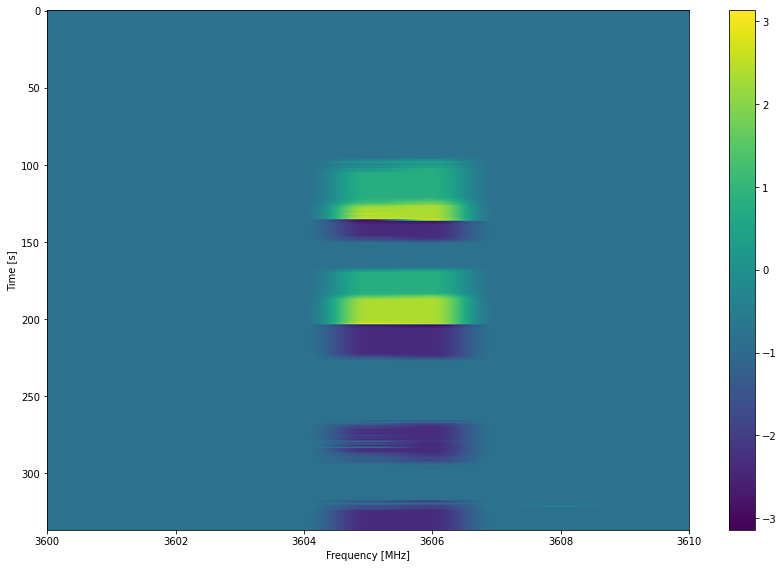

In [63]:
plt.figure(figsize = (12, 8))
plt.imshow(np.angle(vis_all[:,:, 2]),aspect='auto')
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

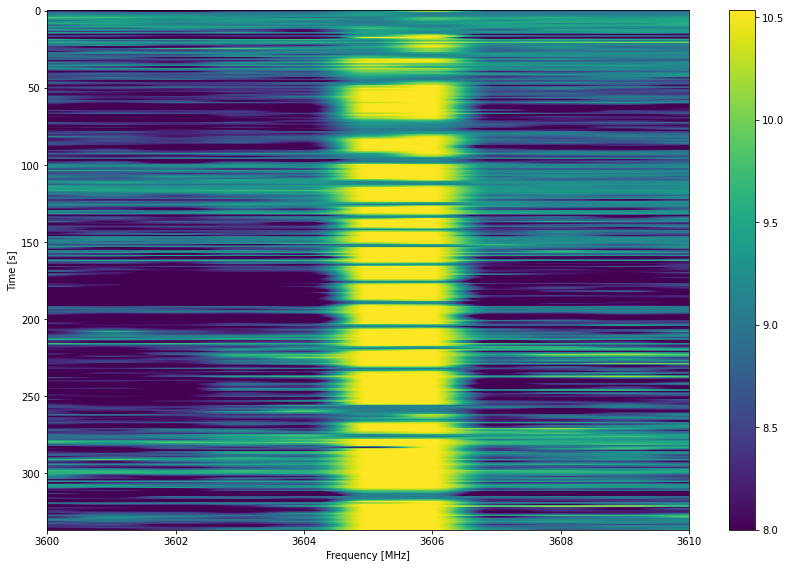

In [31]:
plt.figure(figsize = (12, 8))
plt.imshow(10*np.log10(np.abs(vis_all[:,:, 3])),aspect='auto',vmin=8)
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

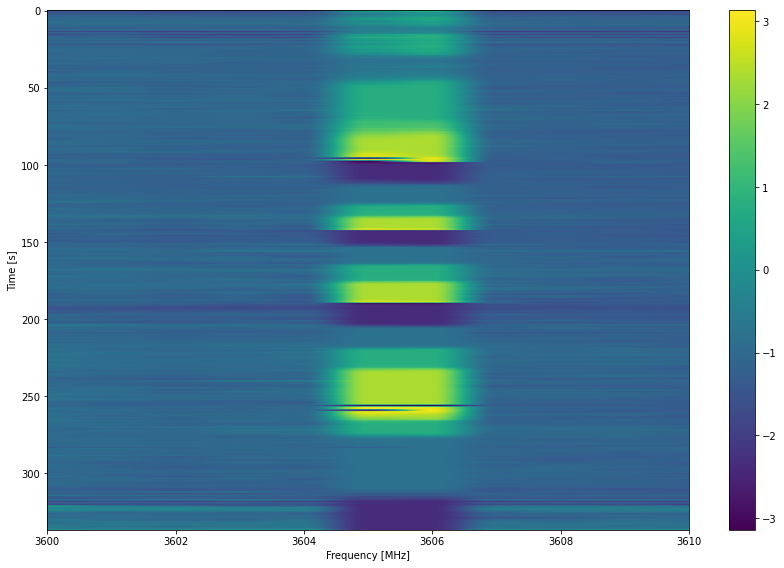

In [64]:
plt.figure(figsize = (12, 8))
plt.imshow(np.angle(vis_all[:,:, 3]),aspect='auto')
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

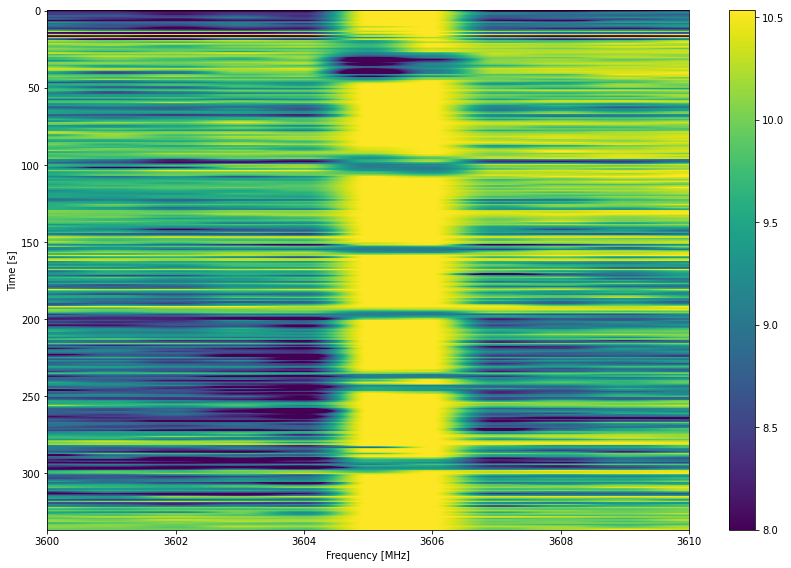

In [32]:
plt.figure(figsize = (12, 8))
plt.imshow(10*np.log10(np.abs(vis_all[:,:, 9])),aspect='auto',vmin=8)
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

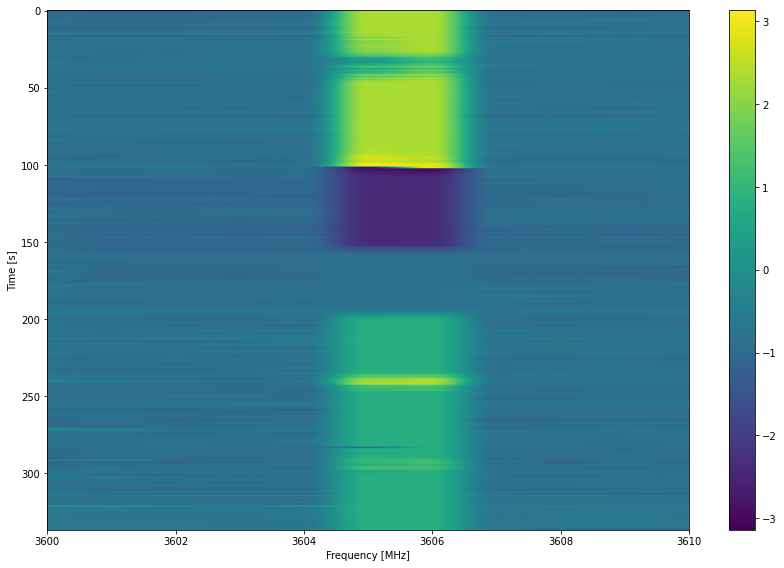

In [65]:
plt.figure(figsize = (12, 8))
plt.imshow(np.angle(vis_all[:,:, 9]),aspect='auto')
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

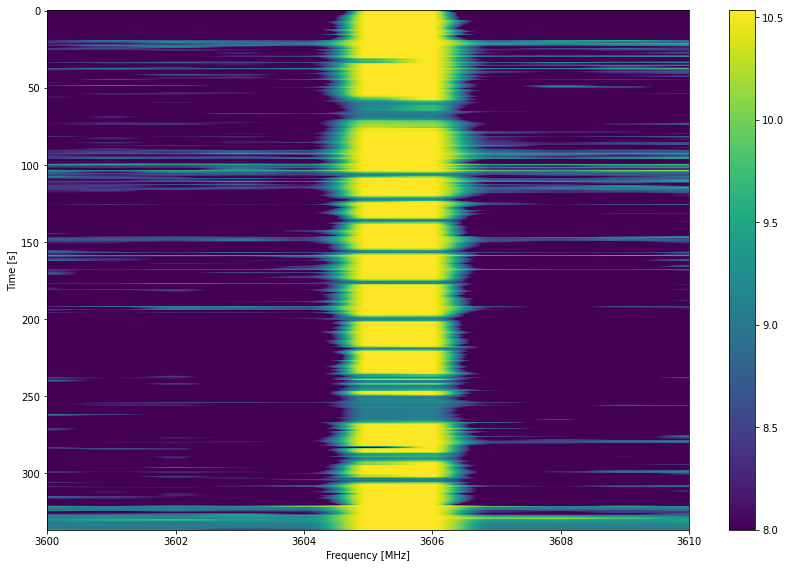

In [33]:
plt.figure(figsize = (12, 8))
plt.imshow(10*np.log10(np.abs(vis_all[:,:, 10])),aspect='auto',vmin=8)
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

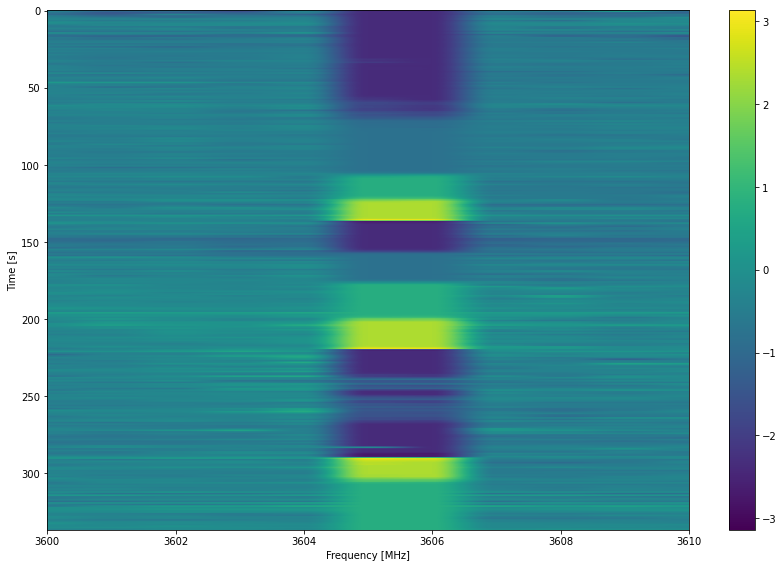

In [66]:
plt.figure(figsize = (12, 8))
plt.imshow(np.angle(vis_all[:,:, 10]),aspect='auto')
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

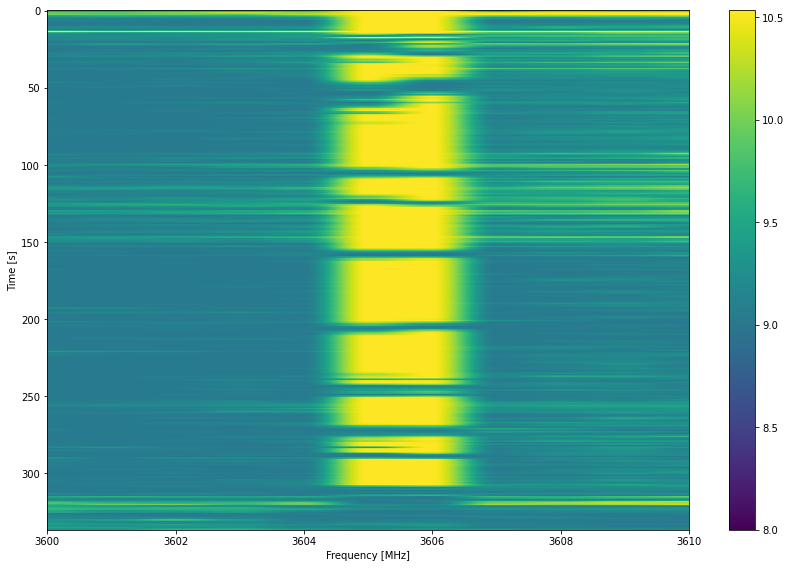

In [34]:
plt.figure(figsize = (12, 8))
plt.imshow(10*np.log10(np.abs(vis_all[:,:, 16])),aspect='auto',vmin=8)
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

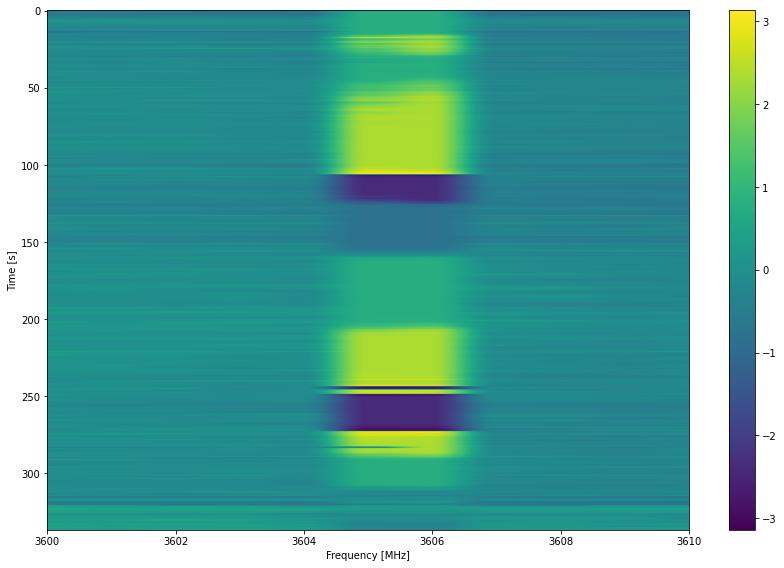

In [67]:
plt.figure(figsize = (12, 8))
plt.imshow(np.angle(vis_all[:,:, 16]),aspect='auto')
plt.ylabel('Time [s]')
plt.xlabel('Frequency [MHz]')
plt.xlim(3600,3610)
plt.colorbar()
plt.tight_layout()

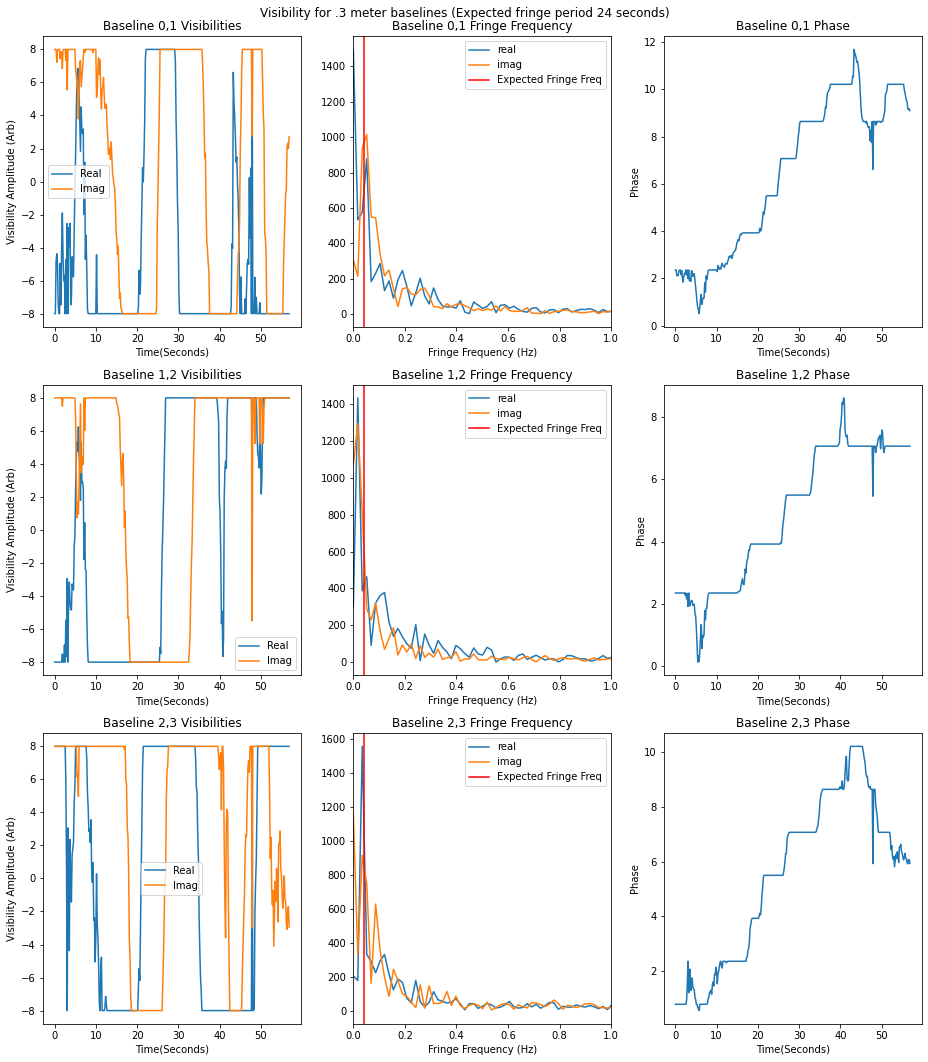

In [248]:
fig, axs = plt.subplots(3,3,figsize=(13,15))
fig.suptitle('Visibility for .3 meter baselines (Expected fringe period 24 seconds)')

axs[0,0].set_ylabel('Visibility Amplitude (Arb)')
axs[0,0].set_xlabel('Time(Seconds)')
axs[0,0].set_title('Baseline 0,1 Visibilities')
axs[0,0].plot(time_seconds,vis_all[:,3605, 1].real, label='Real')
axs[0,0].plot(time_seconds,vis_all[:,3605, 1].imag, label='Imag')

axs[0,1].set_xlabel('Fringe Frequency (Hz)')
axs[0,1].set_title('Baseline 0,1 Fringe Frequency')
freqs = np.fft.fftshift(np.fft.fftfreq(len(time_seconds), d = np.mean(np.diff(t_all))))
axs[0,1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 1].real))),label='real')
axs[0,1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 1].imag))),label='imag')
axs[0,1].set_xlim(0,1)
axs[0,1].axvline(0.0416, c='r', label='Expected Fringe Freq')

axs[0,2].set_ylabel('Phase')
axs[0,2].set_xlabel('Time(Seconds)')
axs[0,2].set_title('Baseline 0,1 Phase')
axs[0,2].plot(time_seconds,np.unwrap(np.angle(vis_all[:,3605, 1])))


axs[1,0].set_ylabel('Visibility Amplitude (Arb)')
axs[1,0].set_xlabel('Time(Seconds)')
axs[1,0].set_title('Baseline 1,2 Visibilities')
axs[1,0].plot(time_seconds,vis_all[:,3605, 9].real, label='Real')
axs[1,0].plot(time_seconds,vis_all[:,3605, 9].imag, label='Imag')

axs[1,1].set_xlabel('Fringe Frequency (Hz)')
axs[1,1].set_title('Baseline 1,2 Fringe Frequency')
freqs = np.fft.fftshift(np.fft.fftfreq(len(time_seconds), d = np.mean(np.diff(t_all))))
axs[1,1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 9].real))),label='real')
axs[1,1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 9].imag))),label='imag')
axs[1,1].set_xlim(0,1)
axs[1,1].axvline(0.0416, c='r', label='Expected Fringe Freq')

axs[1,2].set_ylabel('Phase')
axs[1,2].set_xlabel('Time(Seconds)')
axs[1,2].set_title('Baseline 1,2 Phase')
axs[1,2].plot(time_seconds,np.unwrap(np.angle(vis_all[:,3605, 9])))


axs[2,0].set_title('Baseline 2,3 Visibilities')
axs[2,0].set_ylabel('Visibility Amplitude (Arb)')
axs[2,0].set_xlabel('Time(Seconds)')
axs[2,0].plot(time_seconds,vis_all[:,3605, 16].real, label='Real')
axs[2,0].plot(time_seconds,vis_all[:,3605, 16].imag, label='Imag')

axs[2,1].set_xlabel('Fringe Frequency (Hz)')
axs[2,1].set_title('Baseline 2,3 Fringe Frequency')
freqs = np.fft.fftshift(np.fft.fftfreq(len(time_seconds), d = np.mean(np.diff(t_all))))
axs[2,1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 16].real))),label='real')
axs[2,1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 16].imag))),label='imag')
axs[2,1].set_xlim(0,1)
axs[2,1].axvline(0.0416, c='r', label='Expected Fringe Freq')

axs[2,2].set_ylabel('Phase')
axs[2,2].set_xlabel('Time(Seconds)')
axs[2,2].set_title('Baseline 2,3 Phase')
axs[2,2].plot(time_seconds,np.unwrap(np.angle(vis_all[:,3605, 16])))


plt.tight_layout()
axs[0,0].legend()
axs[1,0].legend()
axs[2,0].legend()
axs[0,1].legend()
axs[1,1].legend()
axs[2,1].legend()

plt.savefig('shortbl.pdf')

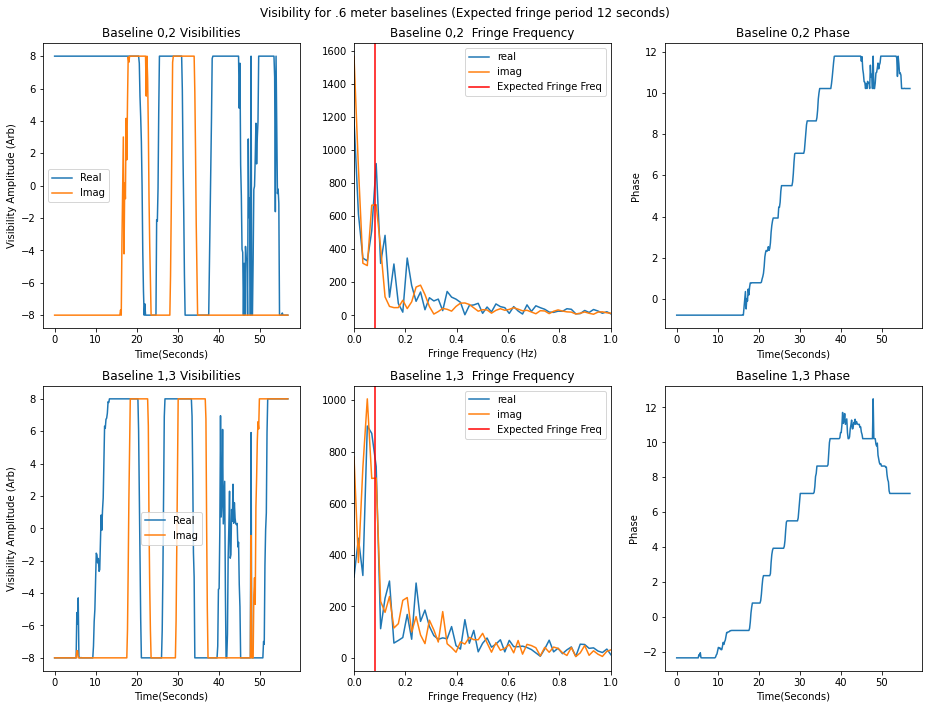

In [249]:
fig, axs = plt.subplots(2,3,figsize=(13,10))
fig.suptitle('Visibility for .6 meter baselines (Expected fringe period 12 seconds)')


axs[0,0].set_ylabel('Visibility Amplitude (Arb)')
axs[0,0].set_xlabel('Time(Seconds)')
axs[0,0].set_title('Baseline 0,2 Visibilities')
axs[0,0].plot(time_seconds,vis_all[:,3605, 2].real, label='Real')
axs[0,0].plot(time_seconds,vis_all[:,3605, 2].imag, label='Imag')

axs[0,1].set_xlabel('Fringe Frequency (Hz)')
axs[0,1].set_title('Baseline 0,2  Fringe Frequency')
freqs = np.fft.fftshift(np.fft.fftfreq(len(time_seconds), d = np.mean(np.diff(t_all))))
axs[0,1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 2].real))),label='real')
axs[0,1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 2].imag))),label='imag')
axs[0,1].set_xlim(0,1)
axs[0,1].axvline(0.0833, c='r', label='Expected Fringe Freq')

axs[0,2].set_ylabel('Phase')
axs[0,2].set_xlabel('Time(Seconds)')
axs[0,2].set_title('Baseline 0,2 Phase')
axs[0,2].plot(time_seconds,np.unwrap(np.angle(vis_all[:,3605, 2])))



axs[1,0].plot(time_seconds,vis_all[:,3605, 10].real, label='Real')
axs[1,0].plot(time_seconds,vis_all[:,3605, 10].imag, label='Imag')
axs[1,0].set_title('Baseline 1,3 Visibilities')
axs[1,0].set_ylabel('Visibility Amplitude (Arb)')
axs[1,0].set_xlabel('Time(Seconds)')

axs[1,1].set_xlabel('Fringe Frequency (Hz)')
axs[1,1].set_title('Baseline 1,3  Fringe Frequency')
freqs = np.fft.fftshift(np.fft.fftfreq(len(time_seconds), d = np.mean(np.diff(t_all))))
axs[1,1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 10].real))),label='real')
axs[1,1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 10].imag))),label='imag')
axs[1,1].set_xlim(0,1)
axs[1,1].axvline(0.0833, c='r', label='Expected Fringe Freq')

axs[1,2].set_ylabel('Phase')
axs[1,2].set_xlabel('Time(Seconds)')
axs[1,2].set_title('Baseline 1,3 Phase')
axs[1,2].plot(time_seconds,np.unwrap(np.angle(vis_all[:,3605, 10])))


plt.tight_layout()
axs[0,0].legend()
axs[1,0].legend()
axs[0,1].legend()
axs[1,1].legend()

plt.savefig('medbl.pdf')


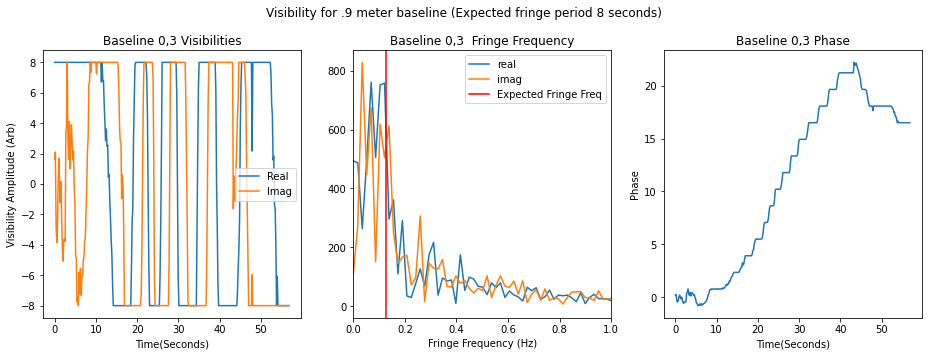

In [250]:
fig, axs = plt.subplots(1,3,figsize=(13,5))

fig.suptitle('Visibility for .9 meter baseline (Expected fringe period 8 seconds)')


axs[0].set_ylabel('Visibility Amplitude (Arb)')
axs[0].set_xlabel('Time(Seconds)')
axs[0].set_title('Baseline 0,3 Visibilities')
axs[0].plot(time_seconds,vis_all[:,3605, 3].real, label='Real')
axs[0].plot(time_seconds,vis_all[:,3605, 3].imag, label='Imag')

axs[1].set_xlabel('Fringe Frequency (Hz)')
axs[1].set_title('Baseline 0,3  Fringe Frequency')
freqs = np.fft.fftshift(np.fft.fftfreq(len(time_seconds), d = np.mean(np.diff(t_all))))
axs[1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 3].real))),label='real')
axs[1].plot(freqs,np.abs(np.fft.fftshift(np.fft.fft(vis_all[:,3605, 3].imag))),label='imag')
axs[1].set_xlim(0,1)
axs[1].axvline(0.125, c='r', label='Expected Fringe Freq')

axs[2].set_ylabel('Phase')
axs[2].set_xlabel('Time(Seconds)')
axs[2].set_title('Baseline 0,3 Phase')
axs[2].plot(time_seconds,np.unwrap((np.angle(vis_all[:,3605, 3]))))


plt.tight_layout()
axs[0].legend()
axs[1].legend()
plt.savefig('longbl.pdf')